<a href="https://colab.research.google.com/github/itspopoy57/Machinelearning/blob/main/SkimLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SkimLit proj.

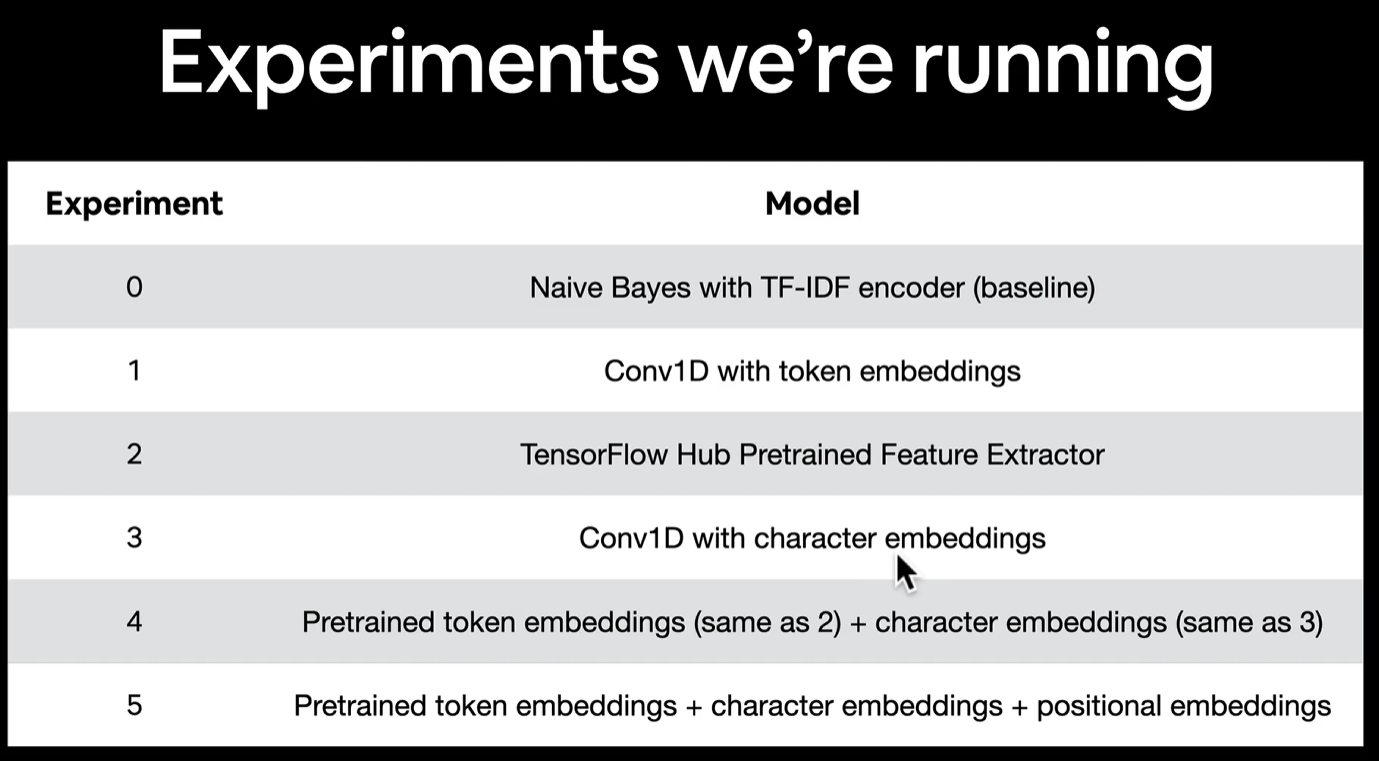

In [1]:
!wget https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py

--2023-12-04 01:50:06--  https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11123 (11K) [text/plain]
Saving to: ‘helper_func.py’

helper_func.py      100%[===================>]  10.86K  --.-KB/s    in 0s      

2023-12-04 01:50:06 (88.8 MB/s) - ‘helper_func.py’ saved [11123/11123]



In [2]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 15.37 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.


In [3]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"


In [4]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

## preprocess data


txt file

In [5]:
def get_lines(filename):
  """
    Read filename ( a text filename) and return the lines of text as a list.

    args:
      filenameL a string containing the target filepath

    returns:
      A list of string with one string per line from the atarget filename
  """

  with open(filename, "r") as f:
    return f.readlines()

In [6]:
# try the fuinction to the train lines
train_lines = get_lines(data_dir+"train.txt")
train_lines[:12]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [7]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

In [8]:

# Get data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)


CPU times: user 708 ms, sys: 115 ms, total: 823 ms
Wall time: 1.14 s


(180040, 30212, 30135)

In [9]:

# Check the first abstract of our training data
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

##data fram visualization

now that our data is in the format of a list of dictionaries, how about we turn into a datafram

In [10]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)
test_df.head(5)

### so basically the def earlier is just making this thing a dataframe

,target,text,line_number,total_lines
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8
1,RESULTS,a post hoc analysis was conducted with the use...,1,8
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8
3,RESULTS,survival analyses were used to assess the asso...,3,8
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8


###train_sentences

In [11]:

# Convert abstract text lines into lists
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [12]:
train_sentences

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

#Model 0

###one hot

In [13]:
## making numeric labels ( mL model needs numeric labels as well) so onehot encode?

## one hot encoding tlabels


# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

###label encode labels

In [14]:
#extract labels ("target" columns) and encode them into integers

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_label_encoded = label_encoder.transform(test_df["target"].to_numpy())

#check how it looks like
train_labels_encoded


array([3, 2, 2, ..., 4, 1, 1])

In [15]:
#get class to text back again
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

#Model 0 real

In [16]:
###basemodel
#### naive bayes with tf-idf encoder
from sklearn.feature_extraction.text import TfidfVectorizer ## will make things into numebr
from sklearn.naive_bayes import MultinomialNB ##  model it here
from sklearn.pipeline import Pipeline ## put it here

#create a pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

#fit the pipeline to the training data
model_0.fit(X=train_sentences,
            y=train_labels_encoded)



Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [17]:
#evaluate baseline on validation dataset
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

##token embedding

In [18]:
#token embedding
## preparing the text we are using
## putting the text to numeric format we are putting it vector and make an embedding out of it

## preparing the data for deep sequence

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers



In [19]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [20]:
#how long is each sentence on average
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len
#we need to make all to 26 so all are the same

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

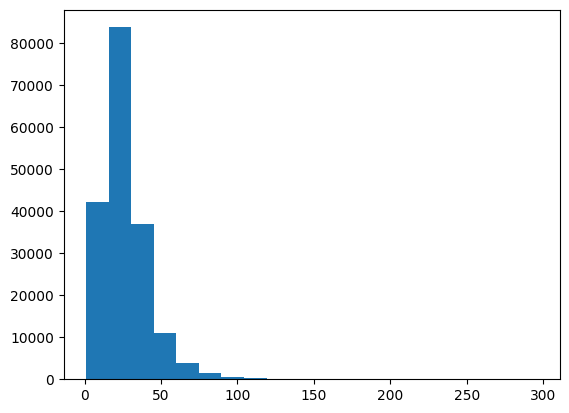

In [21]:
#whats the destribution ookslike
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=20)

In [22]:
## how logn of a sentence length covers 95% of examples?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len


55

##  Text Vectorizedr

In [23]:
###### create text vectorizer
## how many words we have on our vocabulary?
# you can make program for that  orrrrr you can read the docs of the file
## at the file pubmed is20k is 68k
max_tokens = 68000





In [24]:
#Create the vectorizer
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens = max_tokens, #numebr of works in vocab
                                    output_sequence_length = output_seq_len,
                                    input_shape=(1,)) #desired output length of vectorized sequences


In [25]:
## fit it to the dataset
"""
# Convert abstract text lines into lists
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)
"""

#these are our data now
text_vectorizer.adapt(train_sentences)

In [26]:
#testout text Vectorizer on random sentences
import random
target_sentence = random.choice(train_sentences)
print(f"text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence)}")
print(f"\nVectorized text : {text_vectorizer([target_sentence])}")

text:
the overall survival to discharge was @ % ; there was no difference in survival ( p = @ ) or incidence of post operative ileus ( p = @ ) between groups .

Length of text: 153

Vectorized text : [[   2  188  201    6  696   10   61   10   33   74    5  201   14   16
   214    4  624 1216 7679   14   30   24    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [27]:
## how many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab : {len(rct_20k_text_vocab)}")
print(f"Most common words in the vocab: {rct_20k_text_vocab[:5]}")

Number of words in vocab : 64841
Most common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']


In [28]:
#get the config of the text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None, 1),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

##create custom text embedding

In [29]:
## create costum embedding layer with tensorflow
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), #length of the vocabb
                               output_dim=256, #note the higher the number the better but train slower 128 is middle ground for this
                               mask_zero=True, #use masking to handle variable sequence lengths
                               )

so basically we embeeded the vectored phrases lets see what it looks like

In [30]:
print(f"Sentence before vectorization: \n{target_sentence} \n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization: \n{vectorized_sentence} \n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding: \n {embedded_sentence} \n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization: 
the overall survival to discharge was @ % ; there was no difference in survival ( p = @ ) or incidence of post operative ileus ( p = @ ) between groups . 

Sentence after vectorization: 
[[   2  188  201    6  696   10   61   10   33   74    5  201   14   16
   214    4  624 1216 7679   14   30   24    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]] 

Sentence after embedding: 
 [[[-0.02255642 -0.01643575 -0.04737699 ... -0.0027483   0.04525498
    0.0324394 ]
  [-0.01122295  0.03734746 -0.03319978 ... -0.01403487 -0.04178479
   -0.02541074]
  [-0.03687213 -0.03602659  0.00516684 ... -0.02636476 -0.024735
    0.0460585 ]
  ...
  [ 0.01093475 -0.03552128  0.04498198 ... -0.00824664  0.02496501
    0.0049809 ]
  [ 0.01093475 -0.03552128  0.04498198 ... -0.00824664  0.02496501
    0.0049809 ]
  [ 0.01093475 -0.03552128  0.04498198 ... -0.0

###train dataset for training

In [31]:
#creating the dataset perform as we need it
# were going to setup out data to run as fast as possible to tensorflow tf.data.api

#---------
#turn out data into tensorflow datasets
#--------
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot)) ## review how you made the dataset dumbass
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [32]:
## take the dataset and make it a prefetch , batch and
### these are just making it smoother load on our model

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

#Model 1

In [33]:
label_encoder.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [34]:
from tensorflow.keras.layers import TextVectorization, Embedding, Conv1D, GlobalAveragePooling1D, Dense, Flatten
import tensorflow as tf

In [35]:

# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [36]:
#summary
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 55, 256)           16599296  
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            81984     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 5)                 325   

In [37]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [38]:
# Fit the model
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=6,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches

Epoch 1/6
562/562 [==============================] - 44s 60ms/step - loss: 0.8674 - accuracy: 0.6614 - val_loss: 0.6705 - val_accuracy: 0.7517
Epoch 2/6
562/562 [==============================] - 13s 24ms/step - loss: 0.6462 - accuracy: 0.7635 - val_loss: 0.6173 - val_accuracy: 0.7812
Epoch 3/6
562/562 [==============================] - 8s 14ms/step - loss: 0.6055 - accuracy: 0.7809 - val_loss: 0.5840 - val_accuracy: 0.7882
Epoch 4/6
562/562 [==============================] - 5s 9ms/step - loss: 0.5777 - accuracy: 0.7933 - val_loss: 0.5694 - val_accuracy: 0.7926
Epoch 5/6
562/562 [==============================] - 5s 9ms/step - loss: 0.5811 - accuracy: 0.7944 - val_loss: 0.5511 - val_accuracy: 0.8019
Epoch 6/6
562/562 [==============================] - 6s 11ms/step - loss: 0.5703 - accuracy: 0.7947 - val_loss: 0.5497 - val_accuracy: 0.8019


In [39]:

# Evaluate on whole validation dataset (we only validated on 10% of batches during training)
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5432 - accuracy: 0.8071


[0.5431793332099915, 0.8070634007453918]

In [40]:

# Make predictions (our model outputs prediction probabilities for each class)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[5.66366851e-01, 2.13909522e-01, 2.52550077e-02, 1.40098095e-01,
        5.43705784e-02],
       [5.66462815e-01, 1.61809251e-01, 2.18639467e-02, 2.23844573e-01,
        2.60194317e-02],
       [2.22490355e-01, 2.20569503e-03, 2.01516988e-04, 7.75091529e-01,
        1.09478533e-05],
       ...,
       [1.52072289e-05, 3.08456656e-04, 2.99082207e-03, 9.47082754e-06,
        9.96676087e-01],
       [2.09525049e-01, 2.77080417e-01, 1.24926426e-01, 8.85404348e-02,
        2.99927682e-01],
       [6.87253326e-02, 8.81028771e-01, 2.96858158e-02, 3.97116784e-03,
        1.65888779e-02]], dtype=float32)

In [41]:

# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

#Model 2 : feature extraction with pretrained token embeddings,,, transfer learning

###FEATURE EXTRACTOR

In [42]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [43]:
#test out pre trained embedding on a random training sentence
import random

random_train_sentences = random.choice(train_sentences)
print(f"Random sentences: \n {random_train_sentences}")
use_embedded_sentences = tf_hub_embedding_layer([random_train_sentences])
print(f"Sentence after embedding: \n {use_embedded_sentences[0][:30]} \n")
print(f"lenght of the embedding: {len(use_embedded_sentences[0])}")

Random sentences: 
 the efficacy of the acupuncture therapy of regulating qi circulation of fe-organ is better and the adverse reaction is less after long-term persistent treatment .
Sentence after embedding: 
 [ 0.0078852  -0.04906489 -0.01080954 -0.05985819 -0.06914513 -0.04779315
  0.01224786 -0.06846782  0.04757505  0.00666757  0.08321412 -0.02576002
  0.07511776  0.04238912  0.03001086  0.02662211 -0.08706819 -0.00910558
 -0.05387165  0.05308574  0.01702875  0.06048793 -0.00251071  0.00159048
 -0.00884681  0.0493356   0.00969939  0.01622732 -0.05524143  0.02940083] 

lenght of the embedding: 512


##building and fitting an nlp feature extraction model using pretrained embedding

In [44]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) #tokenize text and creating embedding of each sequence 512 long
x = layers.Dense(128, activation="relu")(pretrained_embedding)
#you can add more layers here if you want to
outputs = layers.Dense(num_classes, activation="softmax")(x) ## the numclasses are the classes on df
model_2 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_2_Use_feature_extractor")

#compile
model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [45]:
model_2.summary()

Model: "model_2_Use_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [46]:
#fit model2 to the data
history_model_2 = model_2.fit(train_dataset,
                              epochs=20,
                              steps_per_epoch=int(0.1 * len(train_dataset)),
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))
                              )

Epoch 1/20
562/562 [==============================] - 18s 25ms/step - loss: 0.9205 - accuracy: 0.6496 - val_loss: 0.7967 - val_accuracy: 0.6898
Epoch 2/20
562/562 [==============================] - 13s 23ms/step - loss: 0.7698 - accuracy: 0.7011 - val_loss: 0.7561 - val_accuracy: 0.7008
Epoch 3/20
562/562 [==============================] - 9s 16ms/step - loss: 0.7541 - accuracy: 0.7112 - val_loss: 0.7400 - val_accuracy: 0.7118
Epoch 4/20
562/562 [==============================] - 11s 19ms/step - loss: 0.7213 - accuracy: 0.7216 - val_loss: 0.7126 - val_accuracy: 0.7281
Epoch 5/20
562/562 [==============================] - 10s 17ms/step - loss: 0.7288 - accuracy: 0.7215 - val_loss: 0.6912 - val_accuracy: 0.7354
Epoch 6/20
562/562 [==============================] - 7s 13ms/step - loss: 0.7183 - accuracy: 0.7258 - val_loss: 0.6821 - val_accuracy: 0.7370
Epoch 7/20
562/562 [==============================] - 9s 16ms/step - loss: 0.6864 - accuracy: 0.7394 - val_loss: 0.6661 - val_accuracy: 0.

562/562 [==============================] - 1s 2ms/step - loss: 0.7009 - accuracy: 0.7600 - val_loss: 0.6525 - val_accuracy: 0.7550


In [47]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 19s 20ms/step - loss: 0.6580 - accuracy: 0.7492


[0.6579881310462952, 0.7492055892944336]

In [48]:
#make predictions with feature extraction model
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 16s 16ms/step


array([[4.0473235e-01, 4.7512099e-01, 6.0720753e-04, 1.1095176e-01,
        8.5876603e-03],
       [3.9539433e-01, 5.2464628e-01, 1.5057148e-03, 7.7215411e-02,
        1.2382648e-03],
       [4.6631482e-01, 3.4723043e-02, 2.6232760e-02, 4.3548375e-01,
        3.7245624e-02],
       ...,
       [5.8608630e-04, 6.5652980e-04, 1.8234748e-02, 1.5629854e-04,
        9.8036629e-01],
       [3.3421824e-03, 3.4982752e-02, 1.9326913e-01, 9.1916288e-04,
        7.6748675e-01],
       [6.3451692e-02, 8.0617696e-01, 1.2023188e-01, 1.3383834e-03,
        8.8011501e-03]], dtype=float32)

#Model 3

##Token vs character level embedding

###character level tokenizer

In [48]:
## character lvl tokenizer
train_sentences[:5]

In [50]:
#make a def that will split sentences into characters
def split_chars(text):
  return " ".join(list(text))

#test spltting
split_chars(random_train_sentences)

't h e   e f f i c a c y   o f   t h e   a c u p u n c t u r e   t h e r a p y   o f   r e g u l a t i n g   q i   c i r c u l a t i o n   o f   f e - o r g a n   i s   b e t t e r   a n d   t h e   a d v e r s e   r e a c t i o n   i s   l e s s   a f t e r   l o n g - t e r m   p e r s i s t e n t   t r e a t m e n t   .'

In [51]:
#split sequence-level data splits into character lvl splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_char = [split_chars(sentence) for sentence in test_sentences]
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [53]:
## what is the average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

In [58]:
## find what character length covers 95% of sequence
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [55]:
## get all keyboard char in python
## look for this first
random.choice(train_sentences)

'population pharmacokinetics ( pk ) of azithromycin ( az ) and chloroquine ( cq ) following administration of fixed-dose combination tablet formulations of az and cq ( azcq ) was evaluated using data from two studies : @ ) in children with symptomatic uncomplicated falciparum malaria in sub-saharan africa ; and @ ) in healthy adults in the united states .'

In [57]:
## try this
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [90]:
## create a char-levl token vecxtorizer
NUM_CHAR_TOKENS = len(alphabet) + 2 # add 2 for space and OOv token out of vocab
char_vectorizer  = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                     output_sequence_length = output_seq_char_len,
                                     standardize="lower_and_strip_punctuation", #you can turn this off to make it 50+ change it to "None" for punctuiation
                                     name = "char_vectorizer")

In [91]:
## adapt this to training
##char_vectorizer = tf.keras.layers.StringLookup() ## error so i added this lol
char_vectorizer.adapt(train_chars)

In [92]:
#check char vocab stats
char_vocab = char_vectorizer.get_vocabulary()
print(f" Number of different chars in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f" 5 least common characters : {char_vocab[-5:]}")


 Number of different chars in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
 5 least common characters : ['k', 'x', 'z', 'q', 'j']


In [94]:
#test the character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n {random_train_chars}")
print(f"\nLength of random_train_chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars: \n {vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")



Charified text:
 a s   a   r e s u l t   ,   i t   i s   i m p o r t a n t   t o   d e t e r m i n e   w h e t h e r   a n t i d e p r e s s i v e   t h e r a p y   c a n   l e a d   t o   a m n e s t i c   i m p a i r m e n t   .

Length of random_train_chars: 90

Vectorized chars: 
 [[ 5  9  5  8  2  9 16 12  3  4  3  4  9  4 15 14  7  8  3  5  6  3  3  7
  10  2  3  2  8 15  4  6  2 20 13  2  3 13  2  8  5  6  3  4 10  2 14  8
   2  9  9  4 21  2  3 13  2  8  5 14 19 11  5  6 12  2  5 10  3  7  5 15
   6  2  9  3  4 11  4 15 14  5  4  8 15  2  6  3  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [95]:
## create char embeddign layer
char_embed  = layers.Embedding(input_dim=len(char_vocab), #numebr of the chars
                               output_dim = 25, # this is the size of the char in the paper
                               mask_zero=True,
                               name = "char_embed"
                               )

In [96]:
#test out char embedding
print(f"charified text: \n {random_train_chars}")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embed chars. (after vectorization and embedding): {char_embed_example}")
print(f"character embedding shape: {char_embed_example.shape}")


charified text: 
 a s   a   r e s u l t   ,   i t   i s   i m p o r t a n t   t o   d e t e r m i n e   w h e t h e r   a n t i d e p r e s s i v e   t h e r a p y   c a n   l e a d   t o   a m n e s t i c   i m p a i r m e n t   .
Embed chars. (after vectorization and embedding): [[[ 0.04680971 -0.0323466  -0.03247963 ...  0.01362934 -0.04921185
   -0.02900811]
  [-0.0209051   0.00016038 -0.02099589 ...  0.00374441 -0.02123343
   -0.03962692]
  [ 0.04680971 -0.0323466  -0.03247963 ...  0.01362934 -0.04921185
   -0.02900811]
  ...
  [-0.04836545  0.01454082 -0.02837181 ...  0.04426435 -0.00644642
    0.00493963]
  [-0.04836545  0.01454082 -0.02837181 ...  0.04426435 -0.00644642
    0.00493963]
  [-0.04836545  0.01454082 -0.02837181 ...  0.04426435 -0.00644642
    0.00493963]]]
character embedding shape: (1, 290, 25)


###model 3

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
###pretrained_embedding = tf_hub_embedding_layer(inputs) #tokenize text and creating embedding of each sequence 512 long
x = layers.Conv1D(64, kernel_size=10, padding="same", activation="relu")
x = layers.GlobalAveragePooling1D()(x)
#you can add more layers here if you want to
outputs = layers.Dense(num_classes, activation="softmax")(x) ## the numclasses are the classes on df
model_2 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1d_char_embeddings")

#compile
model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
